In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

data = '/Users/abhudaysingh/Downloads/A,B,CNNS_with_Tim/veggie_heap_training'
test = '/Users/abhudaysingh/Downloads/A,B,CNNS_with_Tim/veggie_heap_testing'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size=32
  )

val_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256),
  batch_size=32
  )

test_ds = tf.keras.utils.image_dataset_from_directory(
  test,
  seed=123,
  image_size=(256,256),
  batch_size=32
)



Found 9835 files belonging to 12 classes.
Using 7868 files for training.
Found 9835 files belonging to 12 classes.
Using 1967 files for validation.
Found 2424 files belonging to 12 classes.


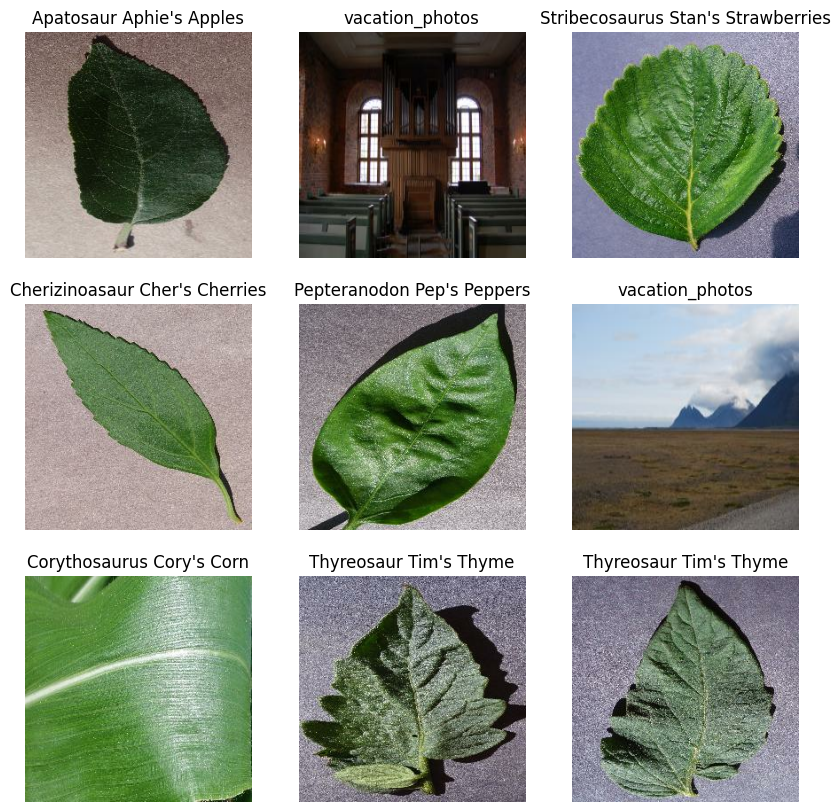

In [2]:
image_batch, label_batch = next(iter(train_ds))
class_names = train_ds.class_names


plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [3]:
cnn = models.Sequential([

    layers.Rescaling(1./255),

    # cnn
    layers.Conv2D(filters = 128, activation = 'relu', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 128, activation = 'relu', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 128, activation = 'relu', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(12, activation = 'softmax'),
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [4]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [5]:
cnn.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

loss, accuracy = cnn.evaluate(
    test_ds
)


print(f"loss = {loss}\nAccuracy = {accuracy*100}")

Epoch 1/3
246/246 ━━━━━━━━━━━━━━━━━━━━ 3104s 13s/step - accuracy: 0.3192 - loss: 2.1141 - val_accuracy: 0.8155 - val_loss: 0.6170
Epoch 2/3
246/246 ━━━━━━━━━━━━━━━━━━━━ 2279s 9s/step - accuracy: 0.8010 - loss: 0.6300 - val_accuracy: 0.9034 - val_loss: 0.3272
Epoch 3/3
246/246 ━━━━━━━━━━━━━━━━━━━━ 2684s 11s/step - accuracy: 0.9036 - loss: 0.3071 - val_accuracy: 0.9151 - val_loss: 0.2624
76/76 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.6155 - loss: 2.1696
loss = 2.1557021141052246
Accuracy = 61.427390575408936


In [6]:
# Get predictions for the test set
y_pred = np.argmax(cnn.predict(test_ds), axis=1)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

76/76 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step


2024-03-16 19:40:51.568329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [8]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

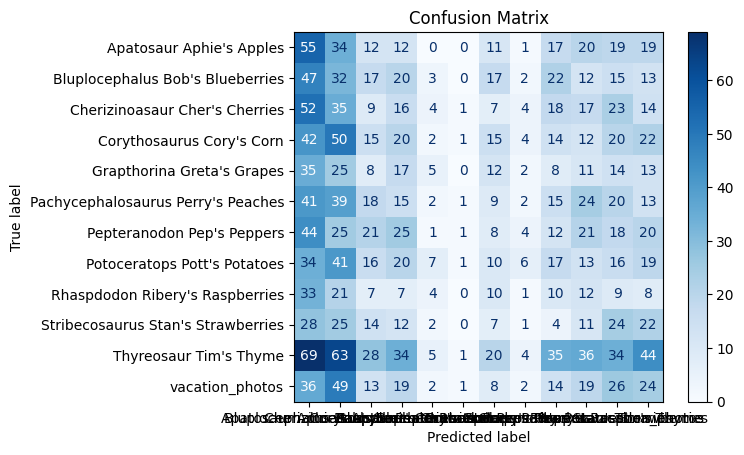

In [9]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()